In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [18]:
import requests 
def download(url,filename):
    response = requests.get(url,stream = True)
    if response.status_code == 200:
        with open(filename,"wb") as f:
            for chunk in response.iter_content(chunk_size = 8192):
                f.write(chunk)
    else:
        print("Failed to download")

In [16]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [22]:
download(filepath, "laptops.csv")
file_name ="laptops.csv"


In [23]:
df = pd.read_csv(file_name, header=0)

In [24]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


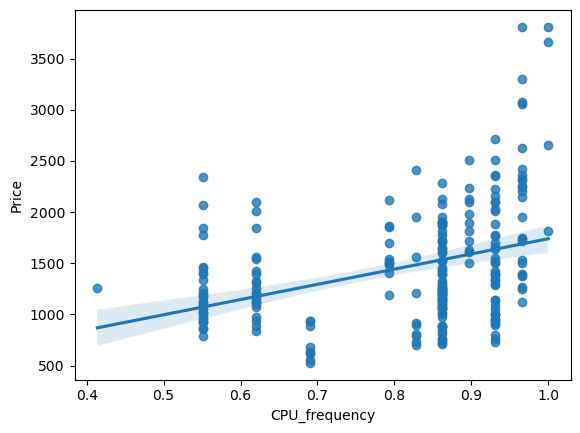

In [25]:
sns.regplot(x="CPU_frequency", y="Price",data =df)
plt.show()

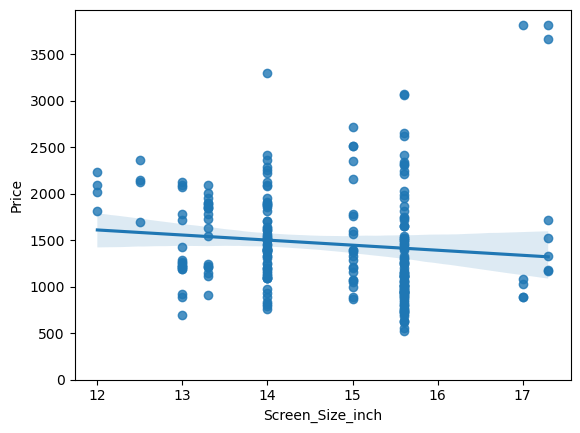

In [26]:
sns.regplot(x ="Screen_Size_inch", y="Price", data = df)
plt.ylim(0,)
plt.show()sns.regplot(x="Weight_pounds", y="Price", data = df)
plt.show()

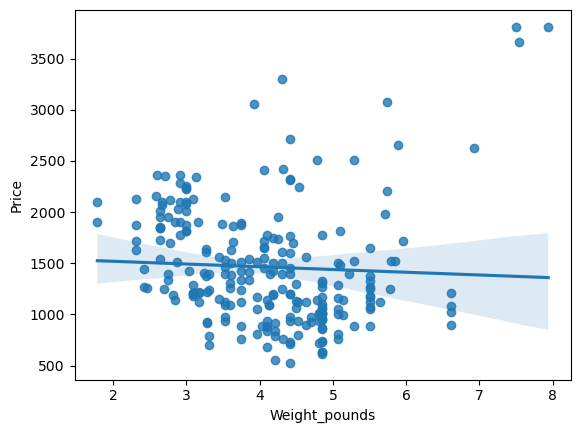

In [27]:
sns.regplot(x="Weight_pounds", y="Price", data = df)
plt.show()

In [28]:
for parm in ["CPU_frequency","Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of price and {parm} is ", df[[parm,"Price"]].corr())

Correlation of price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


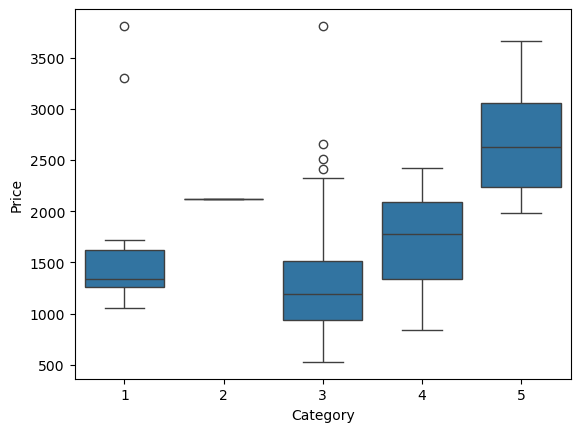

In [29]:
sns.boxplot(x="Category", y="Price", data = df)
plt.show()

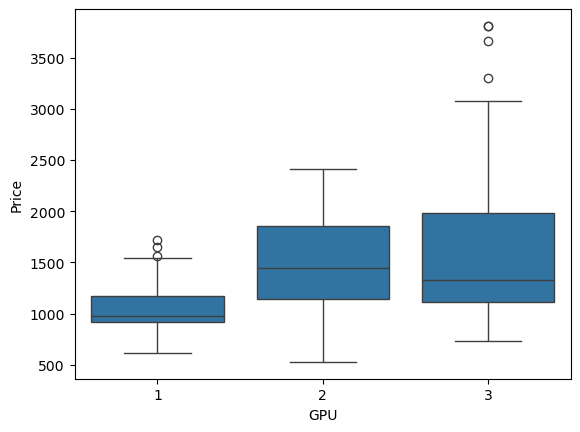

In [30]:
sns.boxplot(x="GPU", y = "Price", data = df)
plt.show()

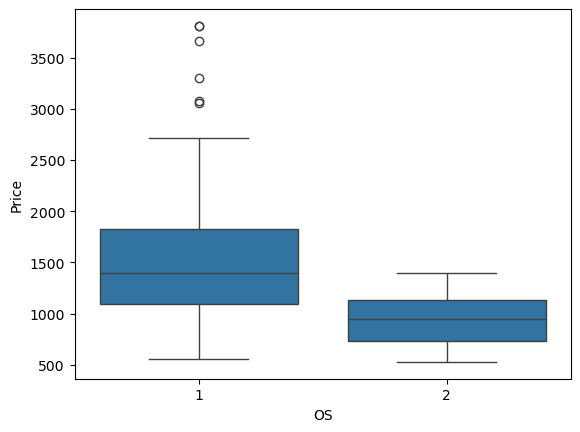

In [31]:
sns.boxplot(x="OS", y = "Price", data = df)
plt.show()

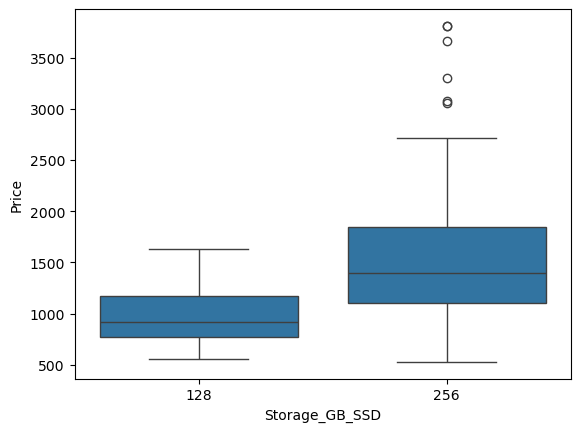

In [32]:
sns.boxplot(x="Storage_GB_SSD", y = "Price", data = df)
plt.show()

In [33]:
print(df.describe())
print(df.describe(include =["object"]))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [34]:
df_test= df[['GPU','CPU_core','Price']]
df_grp= df_test.groupby(["GPU","CPU_core"], as_index = False).mean()
print(df_grp)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [35]:
df_pivot = df_grp.pivot(index = "GPU", columns = 'CPU_core')
print(df_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap = 'RdBu')
row_labels = df_pivot.columns.levels[1]
col_labels= df_pivot.index
ax.set_xticks(np.arange(df_pivot.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(df_pivot.shape[0])+0.5, minor = False)

ax.set_xticklabels(row_labels,minor = False)
ax.set_yticklabels(col_labels, minor = False)

fig.colorbar(im)

In [37]:
for parm in ["RAM_GB", "CPU_frequency","Storage_GB_SSD","Screen_Size_inch","Weight_pounds","CPU_core","OS","GPU","Category"]:
    pearson_coef, p_value = stats.pearsonr(df[parm],df["Price"])
    print(parm)
    print("Pearson correlation coeff for ",parm,"is ",pearson_coef,"with P value of = ",p_value)

RAM_GB
Pearson correlation coeff for  RAM_GB is  0.5492972971857841 with P value of =  3.6815606288429613e-20
CPU_frequency
Pearson correlation coeff for  CPU_frequency is  0.36666555892588615 with P value of =  5.502463350713296e-09
Storage_GB_SSD
Pearson correlation coeff for  Storage_GB_SSD is  0.24342075521810302 with P value of =  0.00014898923191724223
Screen_Size_inch
Pearson correlation coeff for  Screen_Size_inch is  -0.11064420817118273 with P value of =  0.08853397846830766
Weight_pounds
Pearson correlation coeff for  Weight_pounds is  -0.05031225837751551 with P value of =  0.43976938534338944
CPU_core
Pearson correlation coeff for  CPU_core is  0.4593977773355115 with P value of =  7.912950127009034e-14
OS
Pearson correlation coeff for  OS is  -0.22172980114827384 with P value of =  0.0005696642559246749
GPU
Pearson correlation coeff for  GPU is  0.28829819888814273 with P value of =  6.166949698364282e-06
Category
Pearson correlation coeff for  Category is  0.286242755812